In [6]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.5 MB/s eta 0:00:00:00:01


In [2]:
!wget https://huggingface.co/datasets/wangyi111/Copernicus-Pretrain/resolve/main/grid_embeddings/embed_map_310k.npz -P data/

--2025-03-26 12:46:23--  https://huggingface.co/datasets/wangyi111/Copernicus-Pretrain/resolve/main/grid_embeddings/embed_map_310k.npz
Resolving huggingface.co (huggingface.co)... 3.160.150.50, 3.160.150.119, 3.160.150.2, ...
Connecting to huggingface.co (huggingface.co)|3.160.150.50|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/ca/4e/ca4e5f6ac6c00101a7ddd1a7c2a16f77584145cf72635774ff11203b11c4d1b9/be1d6537efd98c3fcfea5ed128b4c99659259080250ad2efcb65590ec29270dc?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27embed_map_310k.npz%3B+filename%3D%22embed_map_310k.npz%22%3B&Expires=1742993183&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Mjk5MzE4M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2NhLzRlL2NhNGU1ZjZhYzZjMDAxMDFhN2RkZDFhN2MyYTE2Zjc3NTg0MTQ1Y2Y3MjYzNTc3NGZmMTEyMDNiMTFjNGQxYjkvYmUxZDY1MzdlZmQ5OGMzZmNmZWE1ZWQxMjhiNGM5OTY1OTI1OTA4MDI1MGFkMmVmY2

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [12]:
# load the embedding map
embed_map = np.load('data/embed_map_310k.npz')
# extract the embeddings
embed_map = embed_map['arr_0']

In [ ]:
# reduce dim to 3 using PCA
flat_embeddings = embed_map.reshape(-1, 768)  # Shape (721*1440, 768)
pca = PCA(n_components=3)
reduced = pca.fit_transform(flat_embeddings) # Shape (721*1440, 3)

# normalize the values for visualization
scaler = MinMaxScaler(feature_range=(0, 255))
normalized = scaler.fit_transform(reduced).astype(np.uint8)  # Shape (721*1440, 3)

embed_map_rgb = normalized.reshape(721, 1440, 3)

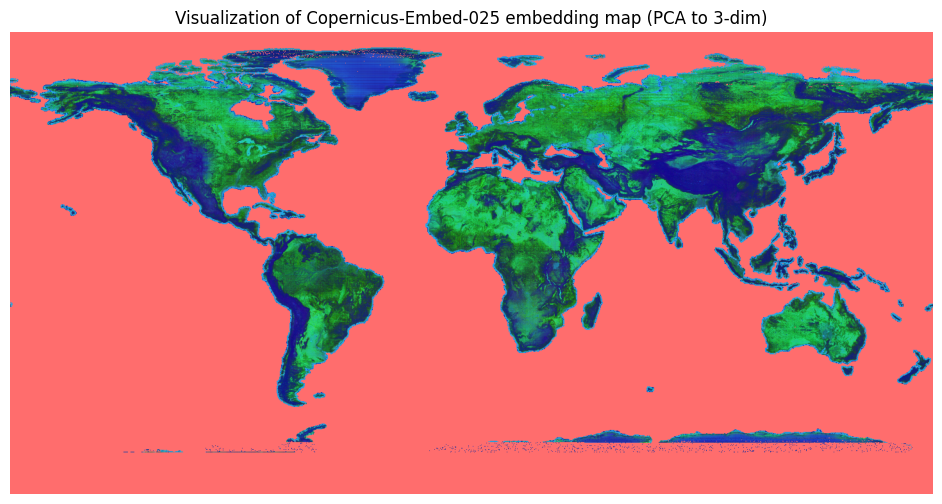

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(embed_map_rgb)
plt.axis("off")
plt.title("Visualization of Copernicus-Embed-025 embedding map (PCA to 3-dim)")
plt.savefig("assets/embed_map_vis.png", dpi=100, bbox_inches="tight")